# <center> 👉 class_07_1 IP » _Geometric Transformations - Affine and Perspective Transformation_ </center>  

## ▣ Geometric Transformations  

Geometric Transform refers to __transforming the shape of an image (image wrapping) by artificially enlarging, reducing, changing the position, rotating, or distorting the image__.
It can be viewed as a process of rearranging the positions of pixel coordinates that make up an image.  

기하학적 변환(Geometric Transform)이란 이미지를 인위적으로 확대, 축소, 위치 변경, 회전, 왜곡하는 등 이미지의 형태를 변환-이미지 뒤틀기(wraping)-하는 것을 의미합니다.  
이미지를 구성하는 픽셀 좌푯값의 위치를 재배치하는 과정으로 볼 수 있습니다.   

## ▶ Affine Transformation  

In Euclidean geometry, an affine transformation or affinity (from the Latin, affinis, "connected with") is a geometric transformation that __preserves lines and parallelism__,   
but not necessarily Euclidean distances and angles.  

- Affine transformation uses a 2×3 matrix and can be expressed using vector sum for matrix multiplication.  

>- 아핀 변환은 2×3 행렬을 사용하며 행렬 곱셈에 벡터 합을 활용해 표현할 수 있는 변환  

In affine transformation, **all parallel lines in the original image will still be parallel in the output image.**   
To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image.   
Then **cv.getAffineTransform** will create a 2x3 matrix which is to be passed to **cv.warpAffine**.

~ Syntax:  
* **martix = cv2.getAffineTransform(pts1, pts2)**  
>- pts1: 3 coordinates of the image before conversion 변환 전 영상의 좌표 3개, 3 x 2 array
>- pts2: 3 coordinates of the image after conversion 변환 후 영상의 좌표 3개, 3 x 2 array
>- matrix: Returns transformation matrix 변환 행렬 반환, 2 x 3 array

    This function provides the function to warp the image as the position of the three coordinates, pts1, changes to pts2.
        이 함수는 3개의 좌표인 pts1이 pts2로 위치가 변한 만큼 이미지를 뒤트는 기능을 제공합니다.  
Check the below example, and also look at the points being selected (which are marked in green color):      

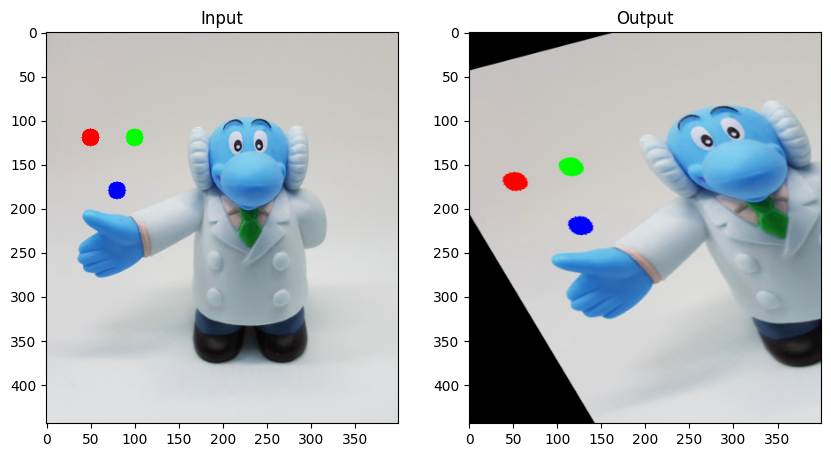

In [1]:
# Affine Transformation 
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

img = cv2.imread('./images/practice_img/dr_ochanomizu.jpg')

rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]]) # 3 coordinates of the image before conversion
pts2 = np.float32([[10,100],[200,50],[100,250]]) # 3 coordinates of the image after conversion

cv2.circle(img, (50,120), 10, (255,0,0),-1)  # Display coordinates on image before conversion
cv2.circle(img, (100,120), 10, (0,255,0),-1)
cv2.circle(img, (80,180), 10, (0,0,255),-1)

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))

figure(figsize=(10, 10), dpi=100)
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [2]:
# Affine Transformation  (getAffine.py)

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/practice_img/duck1.jpg')
# img = cv2.imread('./images/practice_img/red_rider_hood.jpg')

print(img.shape)

(480, 720, 3)


In [3]:
rows, cols = img.shape[:2]

In [4]:
pts1 = np.float32([[100, 50], [200, 50], [100, 200]])
pts2 = np.float32([[80, 70], [210, 60], [250, 120]])

cv2.circle(img, (100,50), 5, (255,0), -1)
cv2.circle(img, (200,50), 5, (0,255,0), -1)
cv2.circle(img, (100,200), 5, (0,0,255), -1)

mtrx = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, mtrx, (int(cols*1.5), rows))

cv2.imshow('origin',img)
cv2.imshow('affin', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

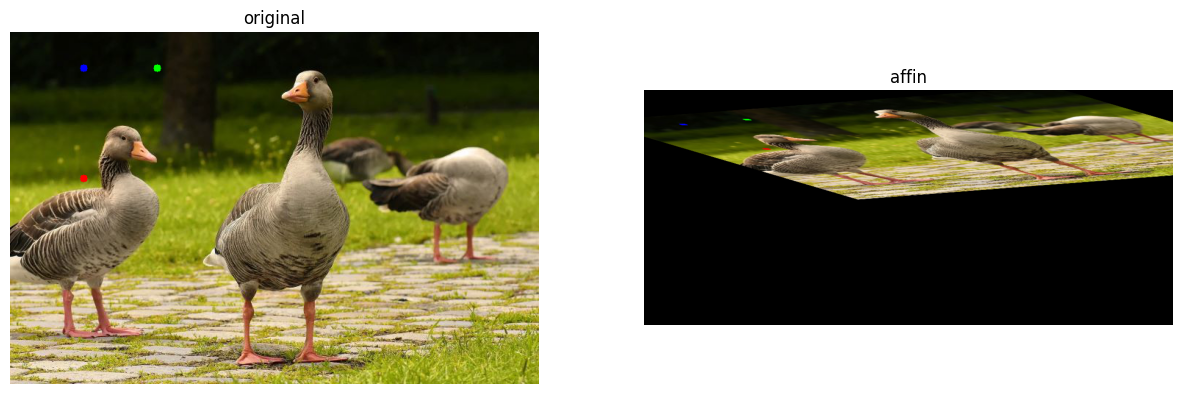

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('affin')

plt.show()

## ▶ Perspective Transformation (원근 변환)  

An affine transformation is a transformation that warps an image into two dimensions.  
On the other hand, __perspective conversion can be thought of as converting an image into three dimensions.__  

The principle of perspective is that things that are __far away appear small and things that are close appear large.__
Perspective conversion is a conversion method that applies the principles of perspective.

    어핀 변환은 이미지를 2차원으로 뒤트는 변환이었습니다.   
    반면 원근 변환은 이미지를 3차원으로 변환한다고 보시면 됩니다.   
    멀리 있는 것은 작게 보이고, 가까이 있는 것은 크게 보이는 게 원근법의 원리입니다.   
    이 원근법의 원리를 적용해 변환하는 방식이 원근 변환입니다.

Perspective Transformation remaps pixels using four points.   
Therefore, declare the pixel coordinates (srcPoint) of the original image before conversion and the pixel coordinates (dstPoint) of the resulting image after conversion to be used for mapping.  
The image is transformed by mapping the pixel coordinates of the original image before conversion to the pixels of the resulting image after conversion.  

    원근 변환(Perspective Transformation)은 네 점을 사용하여 픽셀을 재매핑합니다.  
    그러므로, 매핑에 사용할 변환 전 원본 이미지의 픽셀 좌표(srcPoint)와 변환 후 결과 이미지의 픽셀 좌표(dstPoint)를 선언합니다.  
    변환 전 원본 이미지의 픽셀 좌표가 변환 후 결과 이미지의 픽셀로 매핑되어 이미지가 변형됩니다.

The order of coordinates is top left, top right, bottom right, and bottom left.
- Declared in numpy.array format,
- The order of coordinates must be the same as the original order and the resulting order.
- If the order is not the same, the image may be displayed in a twisted form.  

    좌표의 순서는 좌상, 우상, 우하, 좌하 순서입니다.   
    - numpy.array 형태로 선언하며,   
    - 좌표의 순서는 원본 순서와 결과 순서가 동일해야합니다.
    - 만약, 순서가 동일하지 않다면 비틀린(twist) 형태로 이미지가 표현될 수 있습니다.

➡️ Precision of pixel coordinates 픽셀 좌표의 정밀도(dtype) : float32 type

For perspective transformation, you need a 3x3 transformation matrix.  
- Straight lines will remain straight even after the transformation.   
- To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image.   
- Among these 4 points, 3 of them should not be collinear.   
- Then the transformation matrix can be found by the function  

➡️ The affine transformation takes exactly the form of a 3×3 matrix.  
The third row of the matrix has the values [0, 1, 1] and is not represented in OpenCV. 

        아핀 변환은 정확하게는 3×3 행렬 형태를 갖습니다.   
        행렬의 세 번째 행이 [0, 1, 1] 값을 가져 OpenCV에서는 표현하지 않습니다.  

* **mtrx = cv2.getPerspectiveTransform(pts1, pts2)**  

>- pts1: 4 coordinates of the image before conversion 변환 이전 영상의 좌표 4개, 4 x 2 array
>- pts2:  4 coordinates of the image after conversion 변환 이후 영상의 좌표 4개, 4 x 2 array
>- mtrx: Returns transformation matrix 변환행렬 반환, 3 x 3 array

* **cv2.warpPerspective():** all parameters are the same as cv2.warpAffine()

(563, 558, 3)


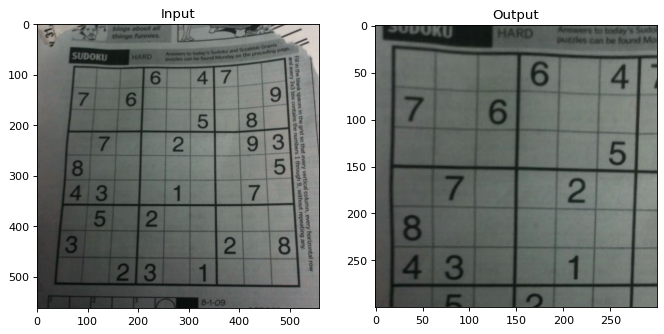

In [6]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)

img = cv2.imread('./images/practice_img/sudoku.png')

rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
print(img.shape)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [7]:
# perspective.py

import cv2
import numpy as np

img = cv2.imread('./images/practice_img/duck1.jpg')

rows, cols, ch = img.shape

pts1 = np.float32([[0,0], [0,rows], [cols, 0], [cols,rows]])
pts2 = np.float32([[100,50], [10,rows-50], [cols-100, 50], [cols-10,rows-50]])

cv2.circle(img, (0,0), 10, (255,0,0), -1)
cv2.circle(img, (0,rows), 10, (0,255,0), -1)
cv2.circle(img, (cols,0), 10, (0,0,255), -1)
cv2.circle(img, (cols,rows), 10, (0,255,255), -1)

mtrx = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, mtrx, (cols, rows))

cv2.imshow("origin", img)
cv2.imshow('perspective', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

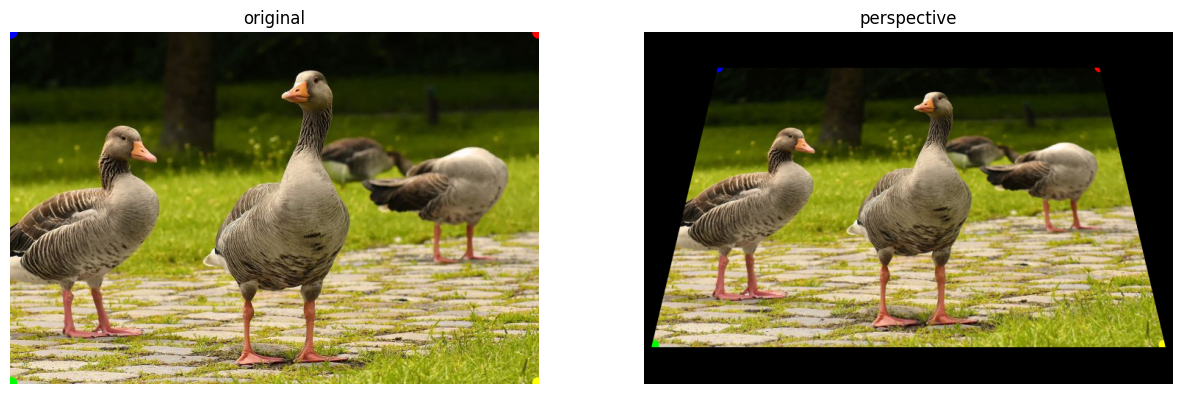

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('perspective')

plt.show()

As a result, the upper part of the image becomes narrower, making it appear as if it is further away. This is perspective transformation.
However, the perspective transformation often used in practice is the opposite.
In the example above, a flat image was converted to a perspective image, but __what is commonly used in practice is converting a perspective image to a flat image__.
For example, using the scan function of a mobile phone camera makes a photographed document look like a scanned document.
This converts a document image with perspective into a flat image.  

실행 결과 이미지의 위쪽 부분의 폭이 좁아져서 마치 멀리 있는 것처럼 보입니다. 이것이 바로 원근 변환입니다.   
하지만 실제로 자주 쓰이는 원근 변환은 이와 반대입니다.   
위 예제에서는 평면 이미지를 원근 이미지로 변환했지만, 실제 많이 쓰이는 것은 원근 이미지를 평면 이미지로 변환하는 것입니다.   
예를 들어 휴대폰 카메라의 스캔 기능을 이용하면 찍힌 문서를 스캔한 문서처럼 만들어 줍니다.   
원근감이 있는 문서 이미지를 평면 이미지로 바꿔주는 것입니다. 

## ▶ Perspective Scan  

Create document scanning effects with mouse and perspective conversion  
마우스와 원근 변환으로 문서 스캔 효과 내기

In [17]:
# perspective_scan.py

import cv2
import numpy as np

win_name = "scanning"
img = cv2.imread("./images/practice_img/paper.jpg")
rows, cols, ch = img.shape
draw = img.copy()
pts_cnt = 0
pts = np.zeros((4,2), dtype=np.float32)


def onMouse(event, x, y, flags, param):  
    global  pts_cnt                     
    if event == cv2.EVENT_LBUTTONDOWN:  
        cv2.circle(draw, (x,y), 10, (0,255,0), -1) 
        cv2.imshow(win_name, draw)

        pts[pts_cnt] = [x,y]            # save mouse coord
        pts_cnt+=1
        if pts_cnt == 4:                       
            
            sm = pts.sum(axis=1)                 # coord x+y 
            diff = np.diff(pts, axis = 1)        # coord x-y 

            topLeft = pts[np.argmin(sm)]         # x+y (min) topLeft
            bottomRight = pts[np.argmax(sm)]     # x+y (max) bottomRight 
            topRight = pts[np.argmin(diff)]      # x-y (min) topRight 
            bottomLeft = pts[np.argmax(diff)]    # x-y (max) bottomLeft

            pts1 = np.float32([topLeft, topRight, bottomRight , bottomLeft])

            w1 = abs(bottomRight[0] - bottomLeft[0])    
            w2 = abs(topRight[0] - topLeft[0])          
            h1 = abs(topRight[1] - bottomRight[1])      
            h2 = abs(topLeft[1] - bottomLeft[1])       
            width = max([w1, w2])                       
            height = max([h1, h2])                     

            pts2 = np.float32([[0,0], [width-1,0], [width-1,height-1], [0,height-1]])
            matrx = cv2.getPerspectiveTransform(pts1,pts2)
            
#             print(width,height)

            result = cv2.warpPerspective(img, matrx, (int(width), int(height)))

            cv2.imshow('scanned', result)
            cv2.imwrite('./results/scan_result.png',result)
cv2.imshow(win_name, img)
cv2.setMouseCallback(win_name, onMouse)   
cv2.waitKey(0)
cv2.destroyAllWindows()

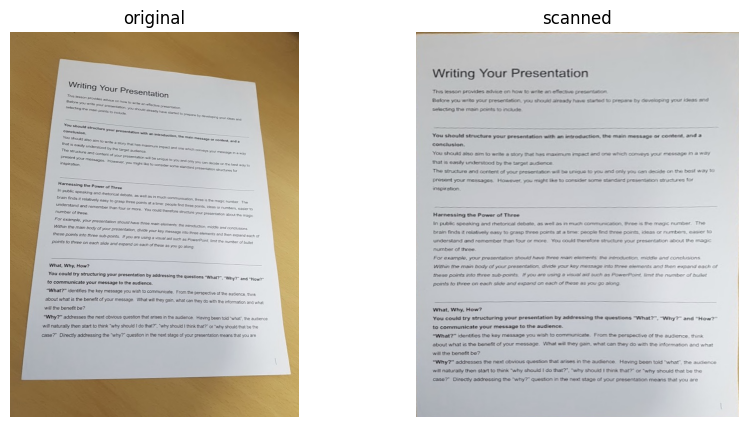

In [16]:
rslt = cv2.imread("./results/scan_result.png")

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(rslt, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('scanned')

plt.show()

In [18]:
import cv2
import numpy as np

win_name = "scanning"
img = cv2.imread("./images/practice_img/rail.jpg")
rows, cols, ch = img.shape
draw = img.copy()
pts_cnt = 0
pts = np.zeros((4,2), dtype=np.float32)

def onMouse(event, x, y, flags, param):  
    global  pts_cnt                     
    if event == cv2.EVENT_LBUTTONDOWN:  
        cv2.circle(draw, (x,y), 10, (0,255,0), -1) 
        cv2.imshow(win_name, draw)

        pts[pts_cnt] = [x,y]           
        pts_cnt+=1
        if pts_cnt == 4:                       
            
            sm = pts.sum(axis=1)                 
            diff = np.diff(pts, axis = 1)       

            topLeft = pts[np.argmin(sm)]         
            bottomRight = pts[np.argmax(sm)]     
            topRight = pts[np.argmin(diff)]     
            bottomLeft = pts[np.argmax(diff)]  

            pts1 = np.float32([topLeft, topRight, bottomRight , bottomLeft])

            w1 = abs(bottomRight[0] - bottomLeft[0])   
            w2 = abs(topRight[0] - topLeft[0])          
            h1 = abs(topRight[1] - bottomRight[1])     
            h2 = abs(topLeft[1] - bottomLeft[1])        
            width = max([w1, w2])                       
            height = max([h1, h2])                     

            pts2 = np.float32([[0,0], [width-1,0], [width-1,height-1], [0,height-1]])
            matrx = cv2.getPerspectiveTransform(pts1,pts2)
#             print(width,height)
            result = cv2.warpPerspective(img, matrx, (int(width), int(height)))

            cv2.imshow('scanned', result)
            cv2.imwrite('./results/scan_result2.png',result)
cv2.imshow(win_name, img)
cv2.setMouseCallback(win_name, onMouse)    
cv2.waitKey(0)
cv2.destroyAllWindows()

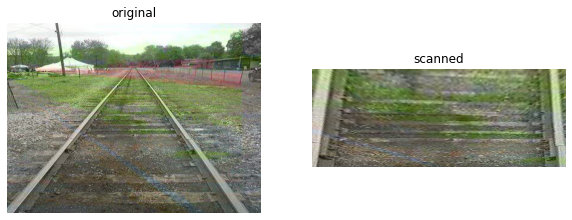

In [27]:
rslt2 = cv2.imread("./results/scan_result2.png")

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(rslt2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('scanned')

plt.show()

In [19]:
# real ex
import cv2
import numpy as np

win_name = "scanning"
img = cv2.imread("./images/leesh.png")
rows, cols, ch = img.shape
draw = img.copy()
pts_cnt = 0
pts = np.zeros((4,2), dtype=np.float32)


def onMouse(event, x, y, flags, param):  
    global  pts_cnt                     
    if event == cv2.EVENT_LBUTTONDOWN:  
        cv2.circle(draw, (x,y), 10, (0,255,0), -1) 
        cv2.imshow(win_name, draw)

        pts[pts_cnt] = [x,y]           
        pts_cnt+=1
        if pts_cnt == 4:                       
            # 좌표 4개 중 상하좌우 찾기 ---② 
            sm = pts.sum(axis=1)                 
            diff = np.diff(pts, axis = 1)       

            topLeft = pts[np.argmin(sm)]         
            bottomRight = pts[np.argmax(sm)]     
            topRight = pts[np.argmin(diff)]     
            bottomLeft = pts[np.argmax(diff)]   
            pts1 = np.float32([topLeft, topRight, bottomRight , bottomLeft])
            w1 = abs(bottomRight[0] - bottomLeft[0])    
            w2 = abs(topRight[0] - topLeft[0])         
            h1 = abs(topRight[1] - bottomRight[1])     
            h2 = abs(topLeft[1] - bottomLeft[1])       
            width = max([w1, w2])                      
            height = max([h1, h2])                     
            pts2 = np.float32([[0,0], [width-1,0], [width-1,height-1], [0,height-1]])
            matrx = cv2.getPerspectiveTransform(pts1,pts2)
#             print(width,height)
            result = cv2.warpPerspective(img, matrx, (int(width), int(height)))

            cv2.imshow('scanned', result)
            cv2.imwrite('./leesh_result.png',result)
cv2.imshow(win_name, img)
cv2.setMouseCallback(win_name, onMouse)    
cv2.waitKey(0)
cv2.destroyAllWindows()

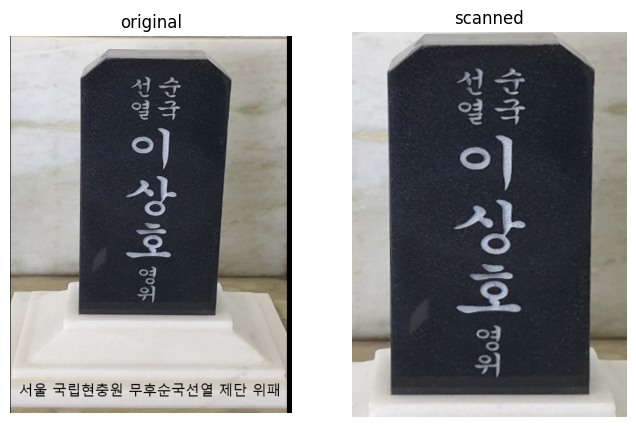

In [4]:
from matplotlib import pyplot as plt

rslt = cv2.imread("./leesh_result.png")

fig, axs = plt.subplots(1, 2, figsize=(8,5))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(rslt, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('scanned')

plt.show()

## ▶ Triangle Affine Transformation 삼각형 어핀 변환  

The geometric transformation provided by OpenCV is based on a rectangle by default.
Therefore, to convert a triangle shape, you must go through a complex process as shown below.  

OpenCV가 제공하는 기하학적 변환은 기본적으로 사각형이 기준입니다.   
따라서 삼각형 모양의 변환을 하려면 아래와 같이 복잡한 과정을 거쳐야 합니다.

1. Determine three triangle coordinates before affine transformation.
2. After affine transformation, determine three triangle coordinates.
3. Find the coordinates of the circumscribed rectangle surrounding the triangle coordinates before transformation.
4. After conversion, obtain the coordinates of the circumscribed rectangle surrounding the triangle coordinates.
5. Designate the rectangular area in steps 3 and 4 as a region of interest (ROI).
6. Recalculate the triangle coordinates before and after transformation based on the region of interest in Step 5.
7. Obtain a transformation matrix that affinely transforms the triangle coordinates before the transformation in step 6 into the triangle coordinates after the transformation.
8. Apply the transformation matrix obtained in step 7 to perform an affine transformation.
9. Mask only the triangle coordinates from Step 2 in the region of interest transformed in Step 8.
10. Combine the affine transformed image and the original image using the mask obtained in step 9.  


    1. 어핀 변환 전 삼각형 좌표 3개를 정한다.
    2. 어핀 변환 후 삼각형 좌표 3개를 정한다.
    3. 변환 전 삼각형 좌표를 감싸는 외접 사각형 좌표를 구한다.
    4. 변환 후 삼각형 좌표를 감싸는 외접 사각형 좌표를 구한다.
    5. 과정 3, 4의 사각형 영역을 관심 영역(ROI, regison of interest)으로 지정한다.
    6. 과정 5의 관심 영역을 기준으로 변환 전, 후의 삼각형 좌표를 다시 계산한다.
    7. 과정 6의 변환 전 삼각형 좌표를 변환 후 삼각형 좌표로 어핀 변환해주는 변환 행렬을 구한다.
    8. 과정 7에서 구한 변환행렬을 적용해 어핀 변환을 한다.
    9. 과정 8에서 변환된 관심 영역에서 과정 2의 삼각형 좌표만 마스킹한다.
    10. 과정 9에서 구한 마스크를 이용해서 어핀 변환한 이미지와 원본 이미지를 합성한다.

- x, y, w, h = cv2.boudingRect(pts)
>- pts: polygon coordinates 다각형 좌표
>- x, y, w, h = Coordinates and width and height of outside rectangle 외접 사각형의 좌표와 폭과 높이  

- **cv2.fillConvexPoly(img, pts, color, lineTypes)**


In [20]:
# triangle_affine.py

import cv2
import numpy as np

img = cv2.imread("./images/practice_img/taekwonv1.jpg")
img2 = img.copy()
draw = img.copy()

pts1 = np.float32([[188,14], [85,202], [294,216]])
pts2 = np.float32([[128,40], [85,307], [306,167]])

x1,y1,w1,h1 = cv2.boundingRect(pts1)
x2,y2,w2,h2 = cv2.boundingRect(pts2)

roi1 = img[y1:y1+h1, x1:x1+w1]
roi2 = img2[y2:y2+h2, x2:x2+w2]

offset1 = np.zeros((3,2), dtype=np.float32)
offset2 = np.zeros((3,2), dtype=np.float32)
for i in range(3):
    offset1[i][0], offset1[i][1] = pts1[i][0]-x1, pts1[i][1]-y1
    offset2[i][0], offset2[i][1] = pts2[i][0]-x2, pts2[i][1]-y2

mtrx = cv2.getAffineTransform(offset1, offset2)
warped = cv2.warpAffine( roi1, mtrx, (w2, h2), None, cv2.INTER_LINEAR, cv2.BORDER_REFLECT_101)

mask = np.zeros((h2, w2), dtype = np.uint8)
cv2.fillConvexPoly(mask, np.int32(offset2), (255))

warped_masked = cv2.bitwise_and(warped, warped, mask=mask)
roi2_masked = cv2.bitwise_and(roi2, roi2, mask=cv2.bitwise_not(mask))
roi2_masked = roi2_masked + warped_masked
img2[y2:y2+h2, x2:x2+w2] = roi2_masked

cv2.rectangle(draw, (x1, y1), (x1+w1, y1+h1), (0,255,0), 1)
cv2.polylines(draw, [pts1.astype(np.int32)], True, (255,0,0), 1)
cv2.rectangle(img2, (x2, y2), (x2+w2, y2+h2), (0,255,0), 1)
cv2.imshow('origin', draw)
cv2.imshow('warped triangle', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

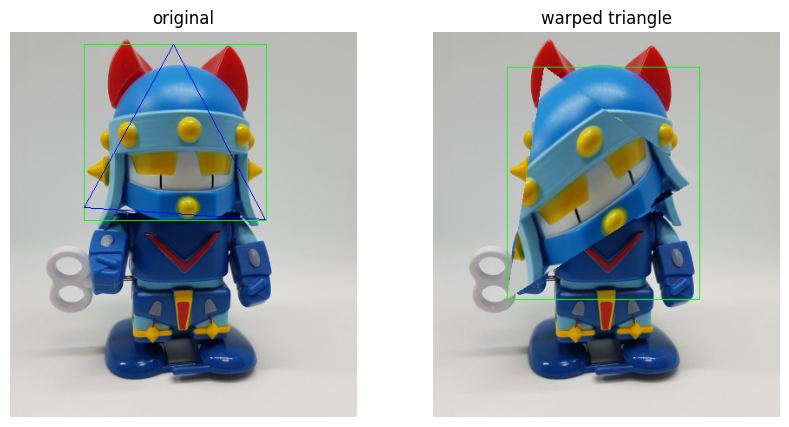

In [120]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('warped triangle')

plt.show()

## End